# Intro to ML Project 2
### 0. [Preprocessing](#Preprocessing)
        0.0 Data Loading
        0.1 Data Cleaning
        0.2 Descrete to Numeric
        0.3 5-fold CV
### 1. [K-Nearest-Neigboor](#K-Nearest-Neigboor)
### 2. [Edited-K-Nearest-Neigboor](#Edited-K-Nearest-Neigboor)
### 3. [Condenced-K-Nearest-Neigboor](#Edited-K-Nearest-Neigboor)

## Preprocessing

In [1]:
# loading libraries
%matplotlib inline
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

In [2]:
## Glass (classification)
file_loc = './Data_Set/glass.data'
glass = np.genfromtxt(file_loc,delimiter=',')
#pd.DataFrame(glass)
glass_y = glass[:,10].astype(int) # target value
glass_X = glass[:,0:10] # features 

In [3]:
## Since we will be using Euclidian distance as Distance measure first we need to normalize 
## each features
def normalize(col, e = 1e-9):
    m = min(col)
    M = max(col)
    return np.array([(x-m+e)/(M-m+e) for x in col])

In [6]:
# Sample normalized data - glass
n_row, n_col = glass_X.shape
glass_X_norm = glass_X.copy()
for idx in range(n_col):
    glass_X_norm[:, idx] = normalize(glass_X[:,idx])
pd.DataFrame(glass_X_norm)

,0,1,2,3,4,5,6,7,8,9
0,4.694836e-12,0.432836,0.437594,1.000000e+00,0.252336,0.351786,9.661836e-03,0.308550,3.174603e-10,1.960784e-09
1,4.694836e-03,0.283582,0.475188,8.017817e-01,0.333333,0.521429,7.729469e-02,0.223048,3.174603e-10,1.960784e-09
2,9.389671e-03,0.220808,0.421053,7.906459e-01,0.389408,0.567857,6.280193e-02,0.218401,3.174603e-10,1.960784e-09
3,1.408451e-02,0.285777,0.372932,8.218263e-01,0.311526,0.500000,9.178744e-02,0.259294,3.174603e-10,1.960784e-09
4,1.877934e-02,0.275241,0.381955,8.062361e-01,0.295950,0.583929,8.856683e-02,0.245353,3.174603e-10,1.960784e-09
...,...,...,...,...,...,...,...,...,...,...
209,9.812207e-01,0.223003,0.512782,2.227171e-10,0.806854,0.500000,1.288245e-02,0.348513,3.365079e-01,1.960784e-09
210,9.859155e-01,0.250220,0.630075,2.227171e-10,0.529595,0.580357,1.610306e-10,0.276022,5.047619e-01,1.960784e-09
211,9.906103e-01,0.417033,0.545865,2.227171e-10,0.538941,0.644643,1.610306e-10,0.279740,5.206349e-01,1.960784e-09
212,9.953052e-01,0.235294,0.548872,2.227171e-10,0.514019,0.678571,1.610306e-10,0.283457,4.984127e-01,1.960784e-09


In [7]:
## Segmetation (classification)
file_loc = './Data_Set/segmentation.data'
segmentation = np.array(pd.read_csv(file_loc, skiprows=[0,1,2,3,4]))
#pd.DataFrame(segmentation)
segmentation_y = segmentation[:, 0] # targets
segmentation_X = segmentation[:,1:] # features
## We need to convert the str value in target in to descrete nums
names = np.unique(segmentation_y)
# creating dict for each {class:int}
d_seg = dict(zip(names, np.linspace(0,len(names)-1,len(names),dtype=int)))
segmentation_y = np.array([d_seg[name] for name in segmentation_y])
# Normalizing each 
n_row, n_col = glass_X.shape
segmentation_X_norm = segmentation_X.copy()
for idx in range(n_col):
    segmentation_X_norm[:, idx] = normalize(segmentation_X[:,idx])

In [8]:
## vote (classification)
file_loc = './Data_Set/house-votes-84.data'
vote = np.loadtxt(file_loc,delimiter=',', dtype=str)
# replaceing y =1, n= -1, ? = 0
d_vote = {'republican':1, 'democrat':0, 'n':-1, 'y':1, '?':0}
vote_X = vote[:,1:] # features
n_row, n_col= vote_X.shape
vote_X_num = vote_X.copy()
vote_X_norm = vote_X.copy()
for i in range(n_row):
    for j in range(n_col):
        vote_X_num[i, j] = d_vote[vote_X[i,j]]
vote_X_num = vote_X_num.astype(float)
for i in range(n_col):
    vote_X_norm[:, i] = normalize(vote_X_num[:,i])
vote_X_norm = vote_X_norm.astype(float)
# extracting target and converting it to integers as 'republican':1, 'democrat':0
vote_y = np.array([d_vote[party] for party in vote[:,0]]) # target

In [9]:
## Abalone (regression)
file_loc = './Data_Set/abalone.data'
abalone = np.array(pd.read_csv(file_loc, header = None))
d_abalone = {'M':0, 'F':1, 'I':2}
abalone_X = abalone[:,:-1] # features 
abalone_y = abalone[:,-1] # target
# converting nominal/str value to interger {'M':-1, 'F':1, 'I':0} ]}
abalone_X[:,0]= [d_abalone[sex] for sex in abalone_X[:,0]]
# Normalizing continuous vals
n_row, n_col = abalone_X.shape
abalone_X_norm = abalone_X.copy()
for idx in range(1,n_col):
    abalone_X_norm[:, idx] = normalize(abalone_X[:,idx])
abalone_y_norm = normalize(abalone_y)

In [11]:
## machine (regression)
file_loc = './Data_Set/machine.data'
machine = np.array(pd.read_csv(file_loc, header = None))
machine_y = machine[:,8].astype(int) # target 
machine_X = machine[:,:8] # features (dropping the ERP)
# normalizing the numeric features
n_row, n_col = machine_X.shape
machine_X_norm = machine_X.copy()
for idx in range(2,n_col):
    machine_X_norm[:, idx] = normalize(machine_X[:,idx])
machine_y_norm = normalize(machine_y)

In [12]:
# Converting makes(str) to numeric
names = np.unique(machine_X_norm[:,0])
indx = np.linspace(0,len(names)-1, len(names)).astype(int)
d_machine = dict(zip(names, indx))
for i in range(n_row):
    machine_X_norm[i,0] = d_machine[machine_X_norm[i,0]]
machine_X_norm[:,0]

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 5, 5, 5, 5,
       5, 5, 6, 6, 6, 6, 6, 6, 8, 8, 8, 8, 8, 8, 8, 8, 8, 7, 7, 7, 7, 7,
       9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11,
       12, 13, 13, 13, 16, 16, 16, 16, 16, 16, 16, 14, 14, 14, 14, 14, 14,
       14, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 17, 17, 17,
       17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17,
       17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18,
       18, 19, 19, 19, 19, 19, 19, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21,
       21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22, 22, 22, 22, 22, 22, 22,
       22, 22, 22, 22, 22, 22, 23, 23, 23, 24, 24, 24, 25, 25, 25, 25, 25,
       26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 27, 27, 27, 27, 27,
       27, 27, 27, 27, 27, 27, 27, 27, 28, 29, 29], dtype=object)

In [13]:
def one_hot(col, val_range):
    res = []
    for i in col:
        arr = [0]*val_range
        arr[i-1]=1
        res.append(arr) 
    return res

In [14]:
col_0_OH = one_hot(machine_X_norm[:,0], 30)

In [15]:
# dropping 2nd column since they are all unique
machine_X_norm= np.column_stack((col_0_OH, machine_X_norm[:,2:]))
machine_X_norm.shape

(209, 36)

In [17]:
## forestfires (regression)
file_loc = './Data_Set/forestfires.data'
forestfires = np.array(pd.read_csv(file_loc, header = 0))
forestfire_y = forestfires[:,12]
# As this data is skewed toward 0.0, using log transformation 
forestfire_y_log = np.array([np.log(num) for num in forestfire_y+1])
forestfire_X = forestfires[:,:12]
# changeing months(str) to int
d_months = dict(zip(np.unique(forestfire_X[:,2]), [4,8,12,2,1,7,6,3,5,11,10,9]))
forestfire_X[:,2] = [d_months[month] for month in forestfire_X[:,2]]
# changing weekdays to int
d_weekdays = dict(zip(['mon', 'tue', 'wed', 'thu', 'fri', 'sat', 'sun'], [1,2,3,4,5,6,7]))
forestfire_X[:,3] = [d_weekdays[day] for day in forestfire_X[:,3]]
# normalizing the rest of the continous values
n_row, n_col = forestfire_X.shape
forestfire_X_norm = forestfire_X.copy()
for idx in range(n_col):
     forestfire_X_norm[:, idx] = normalize(forestfire_X[:,idx])
forestfire_y_norm = normalize(forestfire_y)

## Distance Functions

In [18]:
def euclidean(x1, x2, forest = False):
    """
    Special distance option for forestfire which uses seasonal data
    Input: origin vector x1, query vector x2
    Output: returns L2 norm (euclidian distance between two points)
    """
    assert len(x1)==len(x2)
    
    d_seasonal = lambda x1, x2: min(abs(x1-x2), abs((1-x1)-(1-x2)))
    d = lambda x1, x2: abs(x1-x2)
    dist_metrics = [d,d,d_seasonal,d_seasonal, d,d,d,d,d,d,d,d]
    if forest == True:
        d = 0
        for i in range(len(x1)):
            dist = dist_metrics[i](x1[i], x2[i])
            d += (dist_metrics[i](x1[i], x2[i]))**2
        return np.sqrt(d)
    else:
        return(np.sqrt(sum(np.square(x1-x2))))

In [19]:
# sample of forestfire distance
x1 = forestfire_X_norm[0]
x2 = forestfire_X_norm[1]
euclidean(x1, x2, forest = True)

1.3016375233938817

In [21]:
# sample of distance function, glass
x1 = glass_X_norm[0]
x2 = glass_X_norm[4]
euclidean(x1, x2)

0.3630993523486263

In [22]:
def manhattan(x1, x2):
    """
    Input: origin vector x1, query vector x2
    Output: returns L1 norm (Manhattan distance between two points)
    """
    assert len(x1)==len(x2)
    return(np.mean(abs(x1-x2)))

In [23]:
## For descrete, classification data, we use Hamming Distance as the distant measure
## HD : Hamming Distance, the number of nonmatching attributes
## HD(x, x^t) = sum(x_i \ne x^t_i)
def HD(x1, x2):
    assert len(x1)==len(x2)
    return sum(x1!=x2)

In [24]:
# EX) Distance between sample[0] and sample[1]
print(pd.DataFrame(vote_X[0:2]))
print('Hamming Distace:',HD(vote_X[0], vote_X[1]))

   0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15
0  n  y  n  y  y  y  n  n  n  y  ?  y  y  y  n  y
1  n  y  n  y  y  y  n  n  n  n  n  y  y  y  n  ?
Hamming Distace: 3


# Cross Validation

In [25]:
## 5-fold cross validation split 'stratified'
## 10% for tuning, rest into 5 equal size representing same class distribution
def stratefied_cv_split(data_X, data_y, k_fold=5):

    """
    Function to split data for stratefied k-fold cv testing 
    where each group have same class representation, plus 10% tuning set
    Input: original data
    Output:'indeces' of stratefied k-fold cv sets, and tuning set 
    """
    assert len(data_X) == len(data_y)
    N = len(data_X)
    idx = [i for i in range(N)]
    ## tuning set
    np.random.shuffle(idx)
    tuning_idx = idx[:int(N/10)] # tuning set
    remain = idx[int(N/10):]
    # among the remain, group the data into each classifications
    k_splits = [[] for _ in range(k_folds)]
    classes = np.unique(data_y)
    for c in classes:
        group = np.where(data_y[remain]==c)[0]
        np.random.shuffle(group)
        group_k_splits = np.array_split(group,k_folds)
        np.random.shuffle(group_k_splits)
        for k in range(k_folds):
            holdout = group_k_splits[k]
            np.random.shuffle(holdout)
            k_splits[k].extend(holdout)
    return k_splits, tuning_idx


In [26]:
## Sample of 5 folds cv splits
k_folds = 5
data_X = vote_X
data_y = vote_y
k_splits, tuning_idx = stratefied_cv_split(data_X, data_y, k_folds)

In [27]:
pd.DataFrame(k_splits)

,0,1,2,3,4,5,6,7,8,9,...,69,70,71,72,73,74,75,76,77,78
0,35,118,365,157,171,132,384,97,41,378,...,223,193,208,273,108,75,288,34,134,NaN
1,330,153,28,182,67,89,107,239,348,178,...,51,300,140,389,71,117,287,312,246,NaN
2,13,8,161,204,350,380,229,57,385,106,...,346,202,225,104,374,27,270,274,325,133.0
3,306,126,76,163,387,90,307,177,197,218,...,359,342,278,207,295,125,334,63,24,333.0
4,79,298,319,181,285,361,73,322,162,172,...,292,159,245,222,321,93,351,119,23,NaN


In [28]:
pd.DataFrame(tuning_idx).T

,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,40,41,42
0,288,38,364,258,382,406,389,157,11,264,...,342,388,261,88,109,90,285,269,405,397


In [29]:
## stratefied k_fold cv splits on continuous value target (regression)

def stratefied_cv_split_continuous(data_X, data_y, k_fold = 5):
    """
    Function to split data for stratefied k-fold cv testing 
    where each group have same target value representation, plus 10% tuning set
    Input: original data
    Output:'indeces' of stratefied k-fold cv sets, and tuning set 
    """
    assert len(data_X) == len(data_y)
    N = len(data_X)
    idx = [i for i in range(N)]
    np.random.shuffle(idx)
    tuning_idx = idx[:int(N/10)] # tuning set
    remain_idx = idx[int(N/10):]
    # among the remain, split the data into evenly distributed k sets
    y_remain = np.array(data_y)[remain_idx]
    sorted_idx = np.array([x for _,x in sorted(zip(y_remain,remain_idx))])
    k_splits = []
    for k in range(k_fold):
        holdout = sorted_idx[np.arange(k,len(sorted_idx)-1, k_fold)]
        np.random.shuffle(holdout)
        k_splits.append(holdout)
    return k_splits, tuning_idx


In [30]:
## Sample of 5 folds cv splits, countinous
k_folds = 5
data_X = abalone_X_norm
data_y = abalone_y
k_splits, tuning_idx = stratefied_cv_split(data_X, data_y, k_folds)

In [31]:
pd.DataFrame(k_splits)

,0,1,2,3,4,5,6,7,8,9,...,748,749,750,751,752,753,754,755,756,757
0,2918,638,1662,665,1310,2022,2432,2081,3273,2379,...,2590,1580,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,447,1329,2300,2332,1511,2867,1292,2056,1441,2182,...,320,3229,2070.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,89,3165,1378,3193,1317,2474,1743,3257,694,945,...,1861,1838,3669.0,2840.0,2282.0,72.0,1053.0,177.0,2611.0,1536.0
3,2825,2926,1855,1041,2673,802,3748,1039,2498,3442,...,1435,2578,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3704,1410,3194,2254,827,473,3478,3155,400,2393,...,2594,3137,1605.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
pd.DataFrame(tuning_idx).T

,0,1,2,3,4,5,6,7,8,9,...,407,408,409,410,411,412,413,414,415,416
0,1284,234,2613,3235,2163,2929,3975,2983,1093,3349,...,2843,565,3612,4038,2910,2195,917,1037,544,2526


In [33]:
# Wrapper to generate dataset from index list
def k_fold_cv_sets(k_splits):
    """ 
    Based on the k_splits indices, returns 1 hold out set for testing
    and the rest for training
    Output: k sets of (train_set, test_set)
    """
    k_fold = len(k_splits)
    k_fold_idx = []
    for k in range(k_fold):
        test_set = k_splits[k]
        training_idx = [i for i in range(k_fold) if i !=k]
        train_set = []
        for i in training_idx:
            train_set.extend(k_splits[i])
        k_fold_idx.append((train_set, test_set))
    return k_fold_idx

# KNN Classification

In [34]:
def KNN(data_X, data_y, xq, k, D = euclidean ):
    """
    This function returns a individual knn classification prediction for xq,
    based on the model data set
    Input:
        data_X : matrix, model feature set
        data_y : vector, model targets
        xq: vector, queried item
        k: number of neighbors considered
        D: distance function 
    Out:
        y_hat : predicted class
    """
    n = len(data_X)
    dist = [D(x, xq) for x in data_X]
    idx = [i for i in range(len(dist))]
    sorted_indx = [int(i) for x, i in sorted(zip(dist,idx))]
    k_neighbors = sorted_indx[:k+1][1:]
    if len(k_neighbors)<1:
        return None
    candidates = pd.Series([data_y[neighbor] for neighbor in k_neighbors]).value_counts()  # take the plurarity vote
    y_hat = int(candidates.index[0])
    return y_hat


In [35]:
# sample of prediction for the first batch of k-folding
k_folds = 5
data_X = glass_X_norm
data_y = glass_y
k_splits, tuning_idx = stratefied_cv_split_continuous(data_X, data_y, k_folds)
k_fold_idx = k_fold_cv_sets(k_splits)
train_idx, test_idx =  k_fold_idx[0]
train_X, train_y= data_X[train_idx], data_y[train_idx]
test_X, test_y= data_X[test_idx], data_y[test_idx]
y_hats = []
for i in range(len(test_X)):
    y_hats.append(KNN(data_X, data_y, test_X[i], k=2, D = euclidean))
print(y_hats)

[2, 1, 3, 7, 1, 1, 1, 6, 5, 1, 2, 3, 2, 3, 2, 2, 2, 2, 2, 1, 7, 3, 1, 2, 7, 7, 2, 1, 2, 1, 1, 2, 3, 2, 5, 1, 1, 6, 1]


# Metrics for testing
For discrete value, we use accuracy for correct answer. For continuos value, we use MSE.

In [36]:
def accuracy(data_y, y_hats):
    """
    Input: data_y, true value vector, y_hat, prediction vector
    Output: accuracy as number of correct prediction/ total population
    """
    return np.sum(y_hats==data_y)/len(data_y)

In [37]:
def MSE(data_y, y_hats):
    """
    Input: data_y, true value vector, y_hat, prediction vector
    Output: accuracy as number of correct prediction/ total population
    """
    return np.mean((y_hats-data_y)**2)

In [38]:
def k_tuning(model, data_X, data_y, tuning_idx, ks, repeat= 5,D = euclidean, score = accuracy):
    """
    using given model, test a range of values for k and returns the best
    Input:
        data_X : matrix, model feature set
        data_y : vector, model targets
        ks: values for k to try
        D: distance function 
        score: evaluation function
    Out:
        best_k: best perfoming k
    """
    tuning_X, tuning_y= data_X[tuning_idx], data_y[tuning_idx]
    res = []
    for k in ks:
        res_sub = []
        for i in range(repeat):
            y_hats= []
            for idx in tuning_idx:
                xq = data_X[idx]
                y_hats.append(model(tuning_X, tuning_y, xq, k=k, D =D))
            res_sub.append(score(tuning_y, y_hats))
        res.append(np.mean(res_sub))
    ###plotting results###
    plt.plot(ks, res)
    plt.xlabel('k')
    plt.ylabel('score')
    ######################
    if score == accuaracy:
        best_k = ks[np.argmax(res)]
    if score == MSE:
        best_k = ks[np.argmin(res)]
    return best_k

In [42]:
k_splits, tuning_idx = stratefied_cv_split(data_X, data_y)
def KNN_tuning(data_X, data_y, tuning_idx, ks, repeat= 10,D = euclidean, score = accuracy):
    """
    using KNN test a range of values for k and returns the best
    Input:
        data_X : matrix, model feature set
        data_y : vector, model targets
        ks: values for k to try
        D: distance function 
        score: evaluation function
    Out:
        best_k: best perfoming k
    """
    tuning_X, tuning_y= data_X[tuning_idx], data_y[tuning_idx]
    res = []
    for k in ks:
        res_sub = []
        for i in range(repeat):
            y_hats= []
            for idx in tuning_idx:
                xq = data_X[idx]
                y_hats.append(KNN(tuning_X, tuning_y, xq, k, D = euclidean))
            res_sub.append(score(tuning_y, y_hats))
        res.append(np.mean(res_sub))
    ###plotting results###
    plt.plot(ks, res)
    plt.xlabel('k')
    plt.ylabel('score')
    plt.title('k tuning')
    ######################
    best_k = ks[np.argmax(res)]
    return best_k

In [43]:
k_folds = 5
data_X = glass_X_norm
data_y = glass_y
k_splits, tuning_idx = stratefied_cv_split_continuous(data_X, data_y, k_folds)
k_fold_idx = k_fold_cv_sets(k_splits)

1

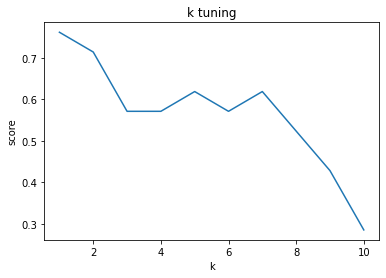

In [45]:
k_splits, tuning_idx = stratefied_cv_split(data_X, data_y)
ks = [1,2,3,4,5,6,7,8,9,10]
KNN_tuning(data_X, data_y, tuning_idx, ks, D = euclidean, score = accuracy)

In [46]:
def cv_test(model, data_X, data_y, k_splits, k=1, D = euclidean, score = accuracy):
    """
    This function conducts stratefied k-hold cv test and 
    based on the model data set using KNN model 
    Input:
        data_X : matrix, model feature set
        data_y : vector, model targets
        k: number of neighbors considered
        D: distance function 
        score: evaluation function
    Out:
        average score over k-folds
    """
    k_fold_idx = k_fold_cv_sets(k_splits)
    k_fold = len(k_splits)
    for i in range(k_fold):
        train_idx, test_idx =  k_fold_idx[i]
        train_X, train_y= data_X[train_idx], data_y[train_idx]
        test_X, test_y= data_X[test_idx], data_y[test_idx]
        y_hats = []
        res = []
        for xq in test_X:
            y_hats.append(model(train_X, train_y, xq, k=k, D = D))
        res.append(score(test_y, y_hats))
    return np.mean(res)

In [47]:
def KNN_cv_test(data_X, data_y, k_splits, k=1, D = euclidean, score = accuracy):
    """
    This function conducts stratefied k-hold cv test and 
    based on the model data set using KNN model 
    Input:
        data_X : matrix, model feature set
        data_y : vector, model targets
        k: number of neighbors considered
        D: distance function 
        score: evaluation function
    Out:
        average score over k-folds
    """
    k_fold_idx = k_fold_cv_sets(k_splits)
    k_fold = len(k_splits)
    for i in range(k_fold):
        train_idx, test_idx =  k_fold_idx[i]
        train_X, train_y= data_X[train_idx], data_y[train_idx]
        test_X, test_y= data_X[test_idx], data_y[test_idx]
        y_hats = []
        res = []
        for xq in test_X:
            y_hats.append(KNN(train_X, train_y, xq, k, D = euclidean))
        res.append(score(test_y, y_hats))
    return np.mean(res)
    

## KNN on glass 

### Parameter tuning- k
We take range of values of k and run cv test then choose the best candidates. 
We will average 5 cv test to determin the score for each values

1

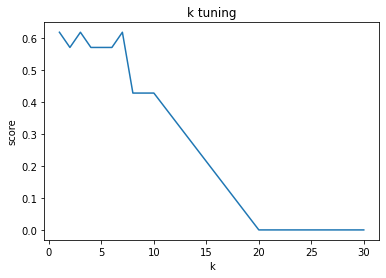

In [49]:
data_X, data_y = glass_X_norm, glass_y
k_splits, tuning_idx = stratefied_cv_split(data_X, data_y)
ks = [1,2,3,4,5,6,7,8,9,10, 20, 30]
KNN_tuning(data_X, data_y, tuning_idx, ks, D = euclidean, score = accuracy)

This indicates k = 2 as the best candidate.

### CV testing 

In [50]:
KNN_cv_test(data_X, data_y, k_splits, k=3, D = euclidean, score = accuracy)

0.85

## KNN on Segmentation

### Parameter tuning 

3

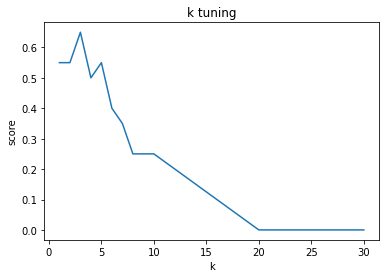

In [55]:
data_X, data_y = segmentation_X_norm, segmentation_y
k_splits, tuning_idx = stratefied_cv_split(data_X, data_y)
ks = [1,2,3,4,5,6,7,8,9,10, 20, 30]
KNN_tuning(data_X, data_y, tuning_idx, ks, D = euclidean, score = accuracy)

### cv testing

In [59]:
KNN_cv_test(data_X, data_y, k_splits, k=2, D = euclidean, score = accuracy)

0.8421052631578947

The optimal k = 2 for Segmentation

## KNN of Vote

### Parameter tuning 

1

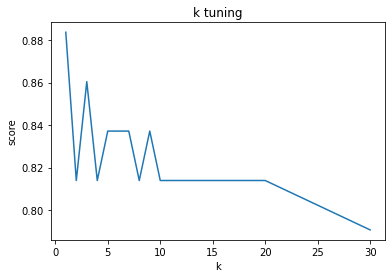

In [64]:
data_X, data_y = vote_X_norm, vote_y
k_splits, tuning_idx = stratefied_cv_split(data_X, data_y)
ks = [1,2,3,4,5,6,7,8,9,10, 20, 30]
KNN_tuning(data_X, data_y, tuning_idx, ks, D = euclidean, score = accuracy)

### cv testing

In [65]:
KNN_cv_test(data_X, data_y, k_splits, k=2, D = euclidean, score = accuracy)

0.9367088607594937

# ENN - Edited k-nearest neighbor

In [66]:
def Edit(train_X, train_y,k=1, D = euclidean, max_iter = 10):
    """
    This function runs a individual KNN classification prediction for xq,
    then if the predcition is correct, the sample gets removed from the set
    Input:
        data_X : matrix, model feature set
        data_y : vector, model targets
        xq: vector, queried item
        k: number of neighbors considered
        D: distance function 
    Out:
        edited_X : edited data_X
    """
    edited_X = train_X.copy()
    edited_y = train_y.copy()
    for j in range(max_iter):
        remove = []
        n = len(edited_X)
        idx = [i for i in range(n)]
        for i in range(n):
            y_hat = KNN(edited_X, edited_y, edited_X[i], k=1, D=D )
            if y_hat!=edited_y[i]:
                remove.append(i)
        keep = list(set(idx)-set(remove))
        edited_X = edited_X[keep]
        edited_y = edited_y[keep]
        if n == len(edited_X):
            break
    return edited_X, edited_y

In [67]:
#Sample of Edited set
data_X, data_y = glass_X_norm, glass_y
k_splits, tuning_idx = stratefied_cv_split(data_X, data_y)
k_fold_idx = k_fold_cv_sets(k_splits)
i = 0
train_idx, test_idx =  k_fold_idx[i]
np.random.shuffle(train_idx)
train_X, train_y = data_X[train_idx], data_y[train_idx]
test_X, test_y= data_X[test_idx], data_y[test_idx]
edited_X, edited_y = Edit(train_X, train_y, D = euclidean)

In [68]:
pd.DataFrame(edited_X)

,0,1,2,3,4,5,6,7,8,9
0,0.065728,0.284460,0.282707,7.995546e-01,0.317757,0.621429,9.339775e-02,0.285316,3.174603e-10,1.960784e-09
1,0.028169,0.275680,0.386466,8.017817e-01,0.264798,0.585714,9.339775e-02,0.254647,3.174603e-10,1.960784e-09
2,0.380282,0.209833,0.378947,7.683742e-01,0.355140,0.600000,9.822866e-02,0.225836,3.174603e-10,1.960784e-09
3,0.840376,0.323529,0.505263,4.877506e-01,0.426791,0.510714,1.610306e-10,0.361524,3.174603e-10,1.960784e-09
4,0.568075,0.240562,0.330827,7.884187e-01,0.414330,0.562500,1.030596e-01,0.241636,3.174603e-10,4.117647e-01
...,...,...,...,...,...,...,...,...,...,...
127,0.600939,0.418349,0.424060,4.654788e-01,0.429907,0.423214,8.534622e-02,0.384758,8.571429e-02,3.333333e-01
128,0.037559,0.352502,0.497744,7.973274e-01,0.336449,0.405357,9.017713e-02,0.266729,3.174603e-10,1.960784e-09
129,0.596244,0.424056,0.458647,5.077951e-01,0.355140,0.389286,7.890499e-02,0.410781,3.174603e-10,3.333333e-01
130,0.896714,0.213784,0.619549,2.227171e-10,0.651090,0.619643,1.610306e-10,0.309480,2.031746e-01,1.764706e-01


In [69]:
pd.DataFrame(edited_y)

,0
0,1
1,1
2,2
3,6
4,2
...,...
127,2
128,1
129,2
130,7


In [70]:
def KNN_predict(edited_X, edited_y, xq, k=1, D = euclidean):
    #edited_X, edited_y = Edits(train_X, train_y, k, D = euclidean, max_iter)
    y_hat = KNN(edited_X, edited_y, xq, k=1, D = euclidean )
    return y_hat

In [71]:
def ENN_tuning(data_X, data_y, tuning_idx, ks, repeat= 10,D = euclidean, score = accuracy):
    """
    using KNN test a range of values for k and returns the best
    Input:
        data_X : matrix, model feature set
        data_y : vector, model targets
        ks: values for k to try
        D: distance function 
        score: evaluation function
    Out:
        best_k: best perfoming k
    """
    tuning_X, tuning_y= data_X[tuning_idx], data_y[tuning_idx]
    edited_X, edited_y = Edit(data_X, data_y, D = D)
    res = []
    for k in ks:
        res_sub = []
        for i in range(repeat):
            y_hats= []
            for xq in tuning_X:
                y_hats.append(KNN(edited_X, edited_y, xq, k, D = euclidean))
            res_sub.append(score(tuning_y, y_hats))
        res.append(np.mean(res_sub))
    ###plotting results###
    plt.plot(ks, res)
    plt.xlabel('k')
    plt.ylabel('score')
    ######################
    best_k = ks[np.argmax(res)]
    return best_k

1

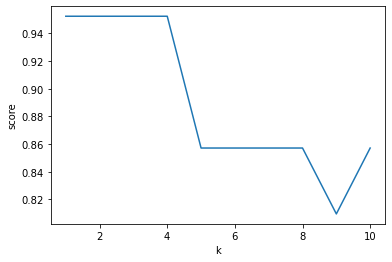

In [81]:
# k tuning on glass
data_X, data_y = glass_X_norm, glass_y
k_splits, tuning_idx = stratefied_cv_split(data_X, data_y)
ks = [1,2,3,4,5,6,7,8,9,10]
ENN_tuning(data_X, data_y, tuning_idx, ks, repeat= 10,D = euclidean, score = accuracy)

In [82]:
def ENN_cv_test(data_X, data_y, k_splits, k=1, D = euclidean, score = accuracy):
    """
    This function conducts stratefied k-hold cv test and 
    based on the model data set using KNN model 
    Input:
        data_X : matrix, model feature set
        data_y : vector, model targets
        k: number of neighbors considered
        D: distance function 
        score: evaluation function
    Out:
        average score over k-folds
    """
    k_fold_idx = k_fold_cv_sets(k_splits)
    k_fold = len(k_splits)
    res = []
    for i in range(k_fold):
        train_idx, test_idx =  k_fold_idx[i]
        np.random.shuffle(train_idx)
        train_X, train_y= data_X[train_idx], data_y[train_idx]
        test_X, test_y= data_X[test_idx], data_y[test_idx]
        edited_X, edited_y = Edit(train_X, train_y, D=euclidean, max_iter=10)
        y_hats = []
        for xq in test_X:
            y_hats.append(KNN(edited_X, edited_y, xq, k=3, D = euclidean))
        res.append(score(test_y, y_hats))
    return np.mean(res)

In [85]:
# ENN on glass
ENN_cv_test(data_X, data_y, k_splits, k=1, D = euclidean, score = accuracy)

0.7970458109931794

1

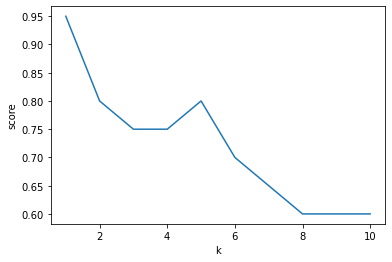

In [88]:
# k tuning on segmentation
data_X, data_y = segmentation_X_norm, segmentation_y
k_splits, tuning_idx = stratefied_cv_split(data_X, data_y)
ks = [1,2,3,4,5,6,7,8,9,10]
ENN_tuning(data_X, data_y, tuning_idx, ks, repeat= 10,D = euclidean, score = accuracy)

In [92]:
# ENN on segmentation
ENN_cv_test(data_X, data_y, k_splits, k=1, D = euclidean, score = accuracy)

0.7270910384068279

2

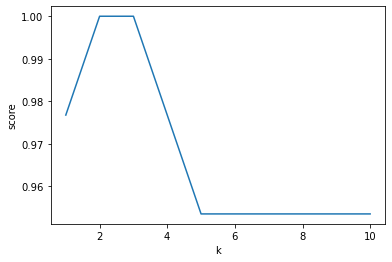

In [95]:
# k tuning on vote
data_X, data_y = vote_X_norm, vote_y
k_splits, tuning_idx = stratefied_cv_split(data_X, data_y)
ks = [1,2,3,4,5,6,7,8,9,10]
ENN_tuning(data_X, data_y, tuning_idx, ks, repeat= 10,D = euclidean, score = accuracy)

In [94]:
# ENN on vote
ENN_cv_test(data_X, data_y, k_splits, k=3, D = euclidean, score = accuracy)

0.9285296981499513

In [ ]:
# ENN on glass
data_X, data_y = glass_X_norm, glass_y
k_splits, tuning_idx = stratefied_cv_split(data_X, data_y)
ENN_cv_test(data_X, data_y, k_splits, k=1, D = euclidean, score = accuracy)

In [ ]:
# ENN on segmentation
data_X, data_y = segmentation_X_norm, segmentation_y
k_splits, tuning_idx = stratefied_cv_split(data_X, data_y)
ENN_cv_test(data_X, data_y, k_splits, k=3, D = euclidean, score = accuracy)

In [ ]:
# ENN on segmentation
data_X, data_y = vote_X_norm, vote_y
k_splits, tuning_idx = stratefied_cv_split(data_X, data_y)
ENN_cv_test(data_X, data_y, k_splits, k=3, D = euclidean, score = accuracy)

# CNN - condenced 

In [96]:
def Condence(train_X, train_y, k=1, D = euclidean, max_iter = 10):
    """
    This function runs a individual KNN classification prediction for xq,
    then if the predcition is correct, the sample gets removed from the set
    Input:
        data_X : matrix, model feature set
        data_y : vector, model targets
        xq: vector, queried item
        k: number of neighbors considered
        D: distance function 
    Out:
        condenced_X : condenced data_X
    """
    condenced_X = [train_X[0]]
    condenced_y = [train_y[0]]

    for j in range(max_iter):
        prev=len(condenced_X)
        for i in range(len(train_X)):
            y_hat = KNN(condenced_X, condenced_y, train_X[i], k=1, D = euclidean )
            if (y_hat== None )or(y_hat!=train_y[i]):
                condenced_X.append(train_X[i])
                condenced_y.append(train_y[i])
        apre = len(condenced_X)
        if prev==apre:
            break
    return condenced_X, condenced_y

In [97]:
# Sample of Condenced samples
data_X, data_y = glass_X_norm, glass_y
k_splits, tuning_idx = stratefied_cv_split(data_X, data_y)
k_fold_idx = k_fold_cv_sets(k_splits)
i = 0
train_idx, test_idx =  k_fold_idx[i]
np.random.shuffle(train_idx)
train_X, train_y= data_X[train_idx], data_y[train_idx]
test_X, test_y= data_X[test_idx], data_y[test_idx]
condenced_X, condenced_y= Condence(train_X, train_y, k=1, D = euclidean)
pd.DataFrame(condenced_X)

,0,1,2,3,4,5,6,7,8,9
0,0.774648,0.463565,0.124812,4.187082e-01,0.395639,0.544643,7.568438e-02,0.555762,3.174603e-10,1.960784e-09
1,0.774648,0.463565,0.124812,4.187082e-01,0.395639,0.544643,7.568438e-02,0.555762,3.174603e-10,1.960784e-09
2,0.028169,0.275680,0.386466,8.017817e-01,0.264798,0.585714,9.339775e-02,0.254647,3.174603e-10,1.960784e-09
3,0.633803,0.295874,0.369925,8.685969e-01,0.314642,0.450000,8.856683e-02,0.279740,3.174603e-10,5.490196e-01
4,0.727700,0.233099,0.347368,7.572383e-01,0.302181,0.571429,8.373591e-02,0.292751,3.174603e-10,1.960784e-09
...,...,...,...,...,...,...,...,...,...,...
67,0.455399,0.275680,0.221053,7.238307e-01,0.271028,0.667857,9.983897e-02,0.322491,3.174603e-10,4.705882e-01
68,0.859155,0.374890,0.575940,2.227171e-10,0.084112,0.655357,1.610306e-10,0.538104,3.174603e-10,1.960784e-09
69,0.516432,0.679982,0.075188,2.227171e-10,0.149533,0.607143,1.610306e-10,0.859665,3.174603e-10,1.960784e-09
70,0.615023,0.658033,0.446617,2.227171e-10,0.333333,0.255357,3.059581e-02,0.744424,3.174603e-10,1.960784e-01


In [98]:
def CNN_tuning(data_X, data_y, tuning_idx, ks, repeat= 10,D = euclidean, score = accuracy):
    """
    using KNN test a range of values for k and returns the best
    Input:
        data_X : matrix, model feature set
        data_y : vector, model targets
        ks: values for k to try
        D: distance function 
        score: evaluation function
    Out:
        best_k: best perfoming k
    """
    tuning_X, tuning_y= data_X[tuning_idx], data_y[tuning_idx]
    condenced_X, condenced_y = Condence(data_X, data_y, D = D)
    res = []
    for k in ks:
        res_sub = []
        for i in range(repeat):
            y_hats= []
            for xq in tuning_X:
                y_hats.append(KNN(condenced_X, condenced_y, xq, k, D = euclidean))
            res_sub.append(score(tuning_y, y_hats))
        res.append(np.mean(res_sub))
    ###plotting results###
    plt.plot(ks, res)
    plt.xlabel('k')
    plt.ylabel('score')
    ######################
    best_k = ks[np.argmax(res)]
    return best_k

1

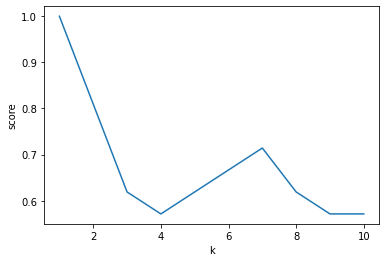

In [99]:
# CNN k tuning on glass
ks = [1,2,3,4,5,6,7,8,9,10]
CNN_tuning(data_X, data_y, tuning_idx, ks, repeat= 10,D = euclidean, score = accuracy)

In [102]:
def CNN_cv_test(data_X, data_y, k_splits, k=1, D = euclidean, score = accuracy):
    """
    This function conducts stratefied k-hold cv test and 
    based on the model data set using KNN model 
    Input:
        data_X : matrix, model feature set
        data_y : vector, model targets
        k: number of neighbors considered
        D: distance function 
        score: evaluation function
    Out:
        average score over k-folds
    """
    k_fold_idx = k_fold_cv_sets(k_splits)
    k_fold = len(k_splits)
    res = []
    for i in range(k_fold):
        train_idx, test_idx =  k_fold_idx[i]
        np.random.shuffle(train_idx)  # random order sample 
        train_X, train_y= data_X[train_idx], data_y[train_idx]
        test_X, test_y= data_X[test_idx], data_y[test_idx]
        condenced_X, condenced_y= Condence(train_X, train_y, k=1, D = euclidean)
        y_hats = []
        for xq in test_X:
            y_hats.append(KNN(condenced_X, condenced_y, xq, k, D = euclidean))
        res.append(score(test_y, y_hats))
    return np.mean(res)

In [103]:
# CNN on glass
CNN_cv_test(data_X, data_y, k_splits, k=1, D = euclidean, score = accuracy)

0.8603238866396762

1

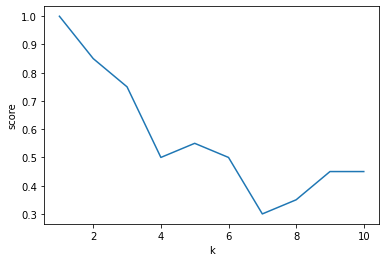

In [104]:
# CNN k tuning on segmentation
data_X, data_y = segmentation_X_norm, segmentation_y
k_splits, tuning_idx = stratefied_cv_split(data_X, data_y)
ks = [1,2,3,4,5,6,7,8,9,10]
CNN_tuning(data_X, data_y, tuning_idx, ks, repeat= 10,D = euclidean, score = accuracy)

In [105]:
# CNN on segmentation
CNN_cv_test(data_X, data_y, k_splits, k=1, D = euclidean, score = accuracy)

0.7053314853314854

In [106]:
# CNN on segmentation
data_X, data_y = segmentation_X_norm, segmentation_y
k_splits, tuning_idx = stratefied_cv_split(data_X, data_y)
CNN_cv_test(data_X, data_y, k_splits, k=1, D = euclidean, score = accuracy)

0.7212058212058212

1

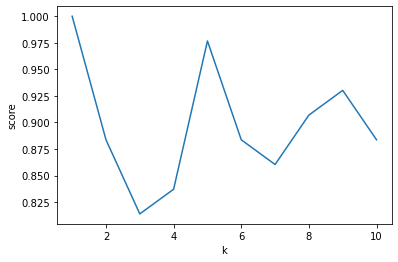

In [107]:
# CNN k tuning on vote
data_X, data_y = vote_X_norm, vote_y
k_splits, tuning_idx = stratefied_cv_split(data_X, data_y)
ks = [1,2,3,4,5,6,7,8,9,10]
CNN_tuning(data_X, data_y, tuning_idx, ks, repeat= 10,D = euclidean, score = accuracy)

In [108]:
# CNN on vote
CNN_cv_test(data_X, data_y, k_splits, k=1, D = euclidean, score = accuracy)

0.8774748458292763

# Regression

In [109]:
def gaussian_kernel(dist, h):
    weight = np.exp(-(dist**2)/h)
    return weight

## KNN

In [110]:
def KNN_regression(data_X, data_y, xq, k=2,h=2, D = euclidean, forest = False ):
    """
    This function returns a individual estimate for xq using Gaussian Kernel 
    based on the model data set
    Input:
        data_X : matrix, model feature set
        data_y : vector, model targets
        xq: vector, queried item
        k: number of neighbors considered
        D: distance function 
    Out:
        y_hat : predicted value
    """

    dist = [D(x, xq) for x in data_X]
    idx = [i for i in range(len(dist))]
    sorted_indx = [int(i) for x, i in sorted(zip(dist,idx))]
    k_neighbors = sorted_indx[:k]
    y_hats = [data_y[neighbor] for neighbor in k_neighbors]
    y_hats = [data_y[neighbor] for neighbor in k_neighbors]
    d_to_neighbors = [D(xq, data_X[neighbor], forest) for neighbor in k_neighbors]
    weights = [gaussian_kernel(d, h) for d in d_to_neighbors]
    y_hat = np.mean(np.multiply(y_hats, weights))
    return y_hat

In [111]:
# prediction sample
data_X, data_y = machine_X_norm, machine_y_norm
k_splits, tuning_idx = stratefied_cv_split(data_X, data_y)
i = 0
k_fold_idx = k_fold_cv_sets(k_splits)
train_idx, test_idx =  k_fold_idx[i]
np.random.shuffle(train_idx)
train_X, train_y= data_X[train_idx], data_y[train_idx]
test_X, test_y= data_X[test_idx], data_y[test_idx]
y_hats= []
for xq in train_X:
    y_hats.append(KNN_regression(train_X, train_y, xq, k=3,h=2, D = euclidean))
y_hats[:20]

[0.033499187739792484,
 0.15949639393392287,
 0.01872304640651799,
 0.006406525480498473,
 0.02501885894642933,
 0.0093240093248753,
 0.04032408773171066,
 0.02490547076150698,
 0.056334901901060115,
 0.18735431235502267,
 0.06280326042337735,
 0.22881322498586298,
 0.022086256979801693,
 0.019784153018801837,
 0.02471300274457271,
 0.01729997493580115,
 0.02036591681287613,
 0.009310129064436996,
 0.006405813060371701,
 0.015121891419215007]

In [112]:
def KNN_regression_tuning(data_X, data_y, tuning_idx, ks, hs, param='k',repeat= 5,D = euclidean, score = MSE, forest = False):
    """
    using KNN test a range of values for k and returns the best
    Input:
        data_X : matrix, model feature set
        data_y : vector, model targets
        ks: values for k to try
        D: distance function 
        score: evaluation function
    Out:
        best_k: best perfoming k
    """
    tuning_X, tuning_y= data_X[tuning_idx], data_y[tuning_idx]
    res = []
    for k in ks:
        res_sub = []
        for i in range(repeat):
            y_hats= []
            for xq in tuning_X:
                y_hats.append(KNN_regression(data_X, data_y, xq, k= k,h=hs[0], D = D, forest = forest))
            res_sub.append(score(tuning_y, y_hats))
        res.append(np.mean(res_sub))
    best_k = ks[np.argmin(res)]
    ###plotting results###
    plt.plot(ks, res)
    plt.xlabel(param)
    plt.ylabel('score')
    plt.title('parameter tuning')
    ######################
    
    res = []
    for h in hs:
        res_sub = []
        for i in range(repeat):
            y_hats= []
            for xq in tuning_X:
                y_hats.append(KNN_regression(data_X, data_y, xq, k=best_k,h=h, D = D, forest = forest))
            res_sub.append(score(tuning_y, y_hats))
        res.append(np.mean(res_sub))
    best_h = hs[np.argmin(res)]
    ###plotting results###
    plt.plot(hs, res)
    plt.xlabel(param)
    plt.ylabel('score')
    ######################
    
    return best_k, best_h

(1, 2)

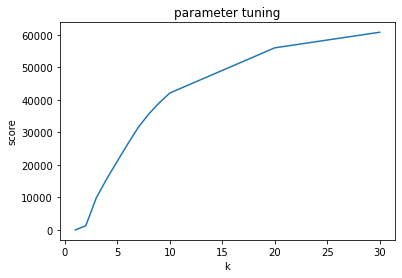

In [113]:
data_X, data_y = machine_X_norm, machine_y
k_splits, tuning_idx = stratefied_cv_split_continuous(data_X, data_y)
ks = [1,2,3,4,5,6,7,8,9,10, 20, 30]
hs = [2]
KNN_regression_tuning(data_X, data_y, tuning_idx,param = 'k', ks= ks, hs=hs, D = euclidean, score = MSE)

In [114]:
def KNN_regression_cv_test(data_X, data_y, k_splits, k=1, h=2, D = euclidean, score = MSE, forest= False):
    """
    This function conducts stratefied k-hold cv test and 
    based on the model data set using KNN model 
    Input:
        data_X : matrix, model feature set
        data_y : vector, model targets
        k: number of neighbors considered
        D: distance function 
        score: evaluation function
    Out:
        average score over k-folds
    """
    k_fold_idx = k_fold_cv_sets(k_splits)
    k_fold = len(k_splits)
    res = []
    for i in range(k_fold):
        train_idx, test_idx =  k_fold_idx[i]
        np.random.shuffle(train_idx)
        np.random.shuffle(test_idx)
        train_X, train_y= data_X[train_idx], data_y[train_idx]
        test_X, test_y= data_X[test_idx], data_y[test_idx]
        y_hats = []
        for xq in test_X:
            y_hats.append(KNN_regression(train_X, train_y, xq, k=k, h=h, D = euclidean, forest= forest))
        res.append(score(test_y, y_hats))
    return np.mean(res)

In [ ]:
data_X, data_y = machine_X_norm, machine_y
k_splits, tuning_idx = stratefied_cv_split_continuous(data_X, data_y)
KNN_regression_cv_test(data_X, data_y, k_splits, k=1, h = 3,D = euclidean, score = MSE)

In [ ]:
#KNN tuning of forestfires
data_X, data_y = forestfire_X_norm, forestfire_y_log
k_splits, tuning_idx = stratefied_cv_split_continuous(data_X, data_y)
ks = [1]
hs = [0.1, 0.5, 1,2,3,4,5, 10]
KNN_regression_tuning(data_X, data_y, tuning_idx,param ='h',ks= ks, hs=hs, D = euclidean, score = MSE, forest= True)

In [ ]:
KNN_regression_cv_test(data_X, data_y, k_splits, k=30, h = 1,D = euclidean, score = MSE, forest= True)

In [ ]:
# KNN on abalone
data_X, data_y = abalone_X_norm, abalone_y_norm
k_splits, tuning_idx = stratefied_cv_split_continuous(data_X, data_y)
ks = [1,2,3]
hs = [1]
KNN_regression_tuning(data_X, data_y, tuning_idx, ks= ks, hs=hs, D = euclidean, score = MSE)

In [ ]:
KNN_regression_cv_test(data_X, abalone_y, k_splits, k=1, h = 1,D = euclidean, score = MSE)

# ENN

In [ ]:
def Edit_regression(train_X,train_y,k=1, h=1, e=1e-3, D = euclidean, max_iter = 10):
    """
    This function runs a individual KNN classification prediction for xq,
    then if the predcition is correct, the sample gets removed from the set
    Input:
        data_X : matrix, model feature set
        data_y : vector, model targets
        xq: vector, queried item
        k: number of neighbors considered
        D: distance function 
    Out:
        edited_X : edited data_X
    """
    edited_X = train_X.copy()
    edited_y = train_y.copy()
    removed = []
    for j in range(max_iter):
        n = len(edited_X)
        idx = [i for i in range(n)]
        for i, xq in enumerate(edited_X):
            y_hat = KNN_regression(train_X, train_y, xq, k=1, h=h, D = euclidean)
            if abs(y_hat-edited_y[i])<= e:
                remove.append(i)
        keep = list(set(idx)-set(remove))
        edited_X = edited_X[keep]
        edited_y = edited_y[keep]
        if n == len(edited_X):
            break
    return edited_X, edited_y

In [ ]:
# edit sample with abalone
data_X, data_y = abalone_X_norm, abalone_y
k_splits, tuning_idx = stratefied_cv_split(data_X, data_y)
i = 0
k_fold_idx = k_fold_cv_sets(k_splits)
train_idx, test_idx =  k_fold_idx[i]
np.random.shuffle(train_idx)
train_X, train_y= data_X[train_idx], data_y[train_idx]
test_X, test_y= data_X[test_idx], data_y[test_idx]
edited_X, edited_y, remove = Edit_regression(train_X, train_y,k=1, h=5, e=0, D = euclidean, max_iter = 1)


In [ ]:
edited_X.shape

In [ ]:
# edit sample with machine
data_X, data_y = machine_X_norm, machine_y_norm
k_splits, tuning_idx = stratefied_cv_split(data_X, data_y)
i = 0
k_fold_idx = k_fold_cv_sets(k_splits)
train_idx, test_idx =  k_fold_idx[i]
np.random.shuffle(train_idx)
train_X, train_y= data_X[train_idx], data_y[train_idx]
edited_X, edited_y=Edit_regression(train_X, train_y,k=1, h=1, e=1e-3, D = euclidean, max_iter = 10)

In [ ]:
remove

In [ ]:
tuning_X, tuning_y= data_X[tuning_idx], data_y[tuning_idx]
    for e in es:
        edited_X, edited_y=Edit_regression(train_X, train_y,k=1, h=1, e=e, D = D)
        res = []
        res_sub = []
        for i in range(repeat):
            y_hats= []
            for xq in tuning_X:
                y_hats.append(KNN_regression(edited_X, edited_y, xq, k=k[0],h=hs[0], D = D))
            res_sub.append(score(tuning_y, y_hats))
        res.append(np.mean(res_sub))
    best_e = es[np.argmin(res)]
    ###plotting results###
    plt.plot(es, res)
    plt.xlabel('k')
    plt.ylabel('score')
    ######################

In [ ]:
np.std(machine_y_norm)

In [ ]:
#KNN_regression(edited_X, edited_y, tuning_X[0], k=1,h=1)
edited_X

In [ ]:
#ENN_regression_tuning on machine
def ENN_reg_e_tuning(data_X, data_y, tuning_idx, es, k=3, h =2, repeat=5, D = euclidean, score = MSE):
    tuning_X, tuning_y= data_X[tuning_idx], data_y[tuning_idx]
    res = []
    for e in es:
        edited_X, edited_y=Edit_regression(data_X, data_y,k=1, h=1, e=e, D = D)
        res_sub = []
        for i in range(repeat):
            y_hats= []
            for xq in tuning_X:
                y_hats.append(KNN_regression(edited_X, edited_y, xq, k=k, h=h, D = D))
            res_sub.append(score(tuning_y, y_hats))
        res.append(np.mean(res_sub))
    best_e = es[np.argmin(res)]
    ###plotting results###
    plt.plot(es, res)
    plt.xlabel('e')
    plt.ylabel('score')
    ######################
    print(best_e)
    
data_X, data_y = machine_X_norm, machine_y
k_splits, tuning_idx = stratefied_cv_split(data_X, data_y) 
es = [1, 2, 5, 10, 20, 100]
ENN_reg_e_tuning(data_X, data_y, tuning_idx, es, repeat = 5,D = euclidean, score = MSE)

In [ ]:
ks = [1,2,3,4,5]

def ENN_reg_k_tuning(data_X, data_y, tuning_idx, ks,e=1, repeat=5, D = euclidean, score = MSE):
    tuning_X, tuning_y= data_X[tuning_idx], data_y[tuning_idx]
    res = []
    for k in ks:
        edited_X, edited_y=Edit_regression(data_X, data_y,k=1, h=1, e=1, D = D)
        res_sub = []
        for i in range(repeat):
            y_hats= []
            for xq in tuning_X:
                y_hats.append(KNN_regression(edited_X, edited_y, xq, k, h=1, D = D))
            res_sub.append(score(tuning_y, y_hats))
        res.append(np.mean(res_sub))
    best_k = ks[np.argmin(res)]
    ###plotting results###
    plt.plot(ks, res)
    plt.xlabel('k')
    plt.ylabel('score')
    ######################
    print(best_k)
data_X, data_y = machine_X_norm, machine_y
k_splits, tuning_idx = stratefied_cv_split(data_X, data_y)   
ENN_reg_k_tuning(data_X, data_y, tuning_idx, ks, repeat = 5,D = euclidean, score = MSE)

In [ ]:
def ENN_reg_h_tuning(data_X, data_y, tuning_idx, hs, k= 1,e=1, repeat=5, D = euclidean, score = MSE):
    tuning_X, tuning_y= data_X[tuning_idx], data_y[tuning_idx]
    res = []
    for h in hs:
        edited_X, edited_y=Edit_regression(data_X, data_y,h=h, e=e,k=1, D = D)
        res_sub = []
        for i in range(repeat):
            y_hats= []
            for xq in tuning_X:
                y_hats.append(KNN_regression(edited_X, edited_y, xq, k, h, D = D))
            res_sub.append(score(tuning_y, y_hats))
        res.append(np.mean(res_sub))
    best_h = hs[np.argmin(res)]
    ###plotting results###
    plt.plot(hs, res)
    plt.xlabel('h')
    plt.ylabel('score')
    ######################
    print(best_h)
    
data_X, data_y = machine_X_norm, machine_y
k_splits, tuning_idx = stratefied_cv_split(data_X, data_y) 
hs = np.linspace(1, 10, 10)
ENN_reg_h_tuning(data_X, data_y, tuning_idx, hs, repeat = 5,D = euclidean, score = MSE)

In [ ]:
#ENN tuning on abalone
data_X, data_y = abalone_X_norm[:500], abalone_y_norm[:500]
k_splits, tuning_idx = stratefied_cv_split_continuous(data_X, data_y)
es= np.linspace(1e-9, 1e-2, 5)
ENN_reg_e_tuning(data_X, data_y, tuning_idx, es, k=4, h=2,repeat = 3,D = euclidean, score = MSE)